# Gradient descent

Gradient descent is a simple algorithm for solving $\min_\theta J(\theta)$ defined in the previous [notebook](./01-univariate-linear-regression.ipynb).
The algorithm uses the following iterative formula to update the $\theta$ value

$$
\Delta \theta = - \alpha \nabla_\theta J(\theta),
$$

where $\alpha \in \mathbb R_+$. The main disadvantage of the algorithm is choosing the proper $\alpha$.

In a case when a single feature is present in the data, the gradient elements are the following:

$$
\begin{cases}
    \frac{\partial J}{\partial \theta_0} = \frac 1m \displaystyle\sum_i [h_\theta(x_i) - y_i], \\[1ex]
    \frac{\partial J}{\partial \theta_1} = \frac 1m \displaystyle\sum_i [h_\theta(x_i) - y_i] x_i.
\end{cases}
$$

Pseudo code:
```
theta = initialize() # random or pick arbitrary value
repeat # until converge
{
    theta = theta - alpha * gradientJ(theta)
}
```

## Example problem data

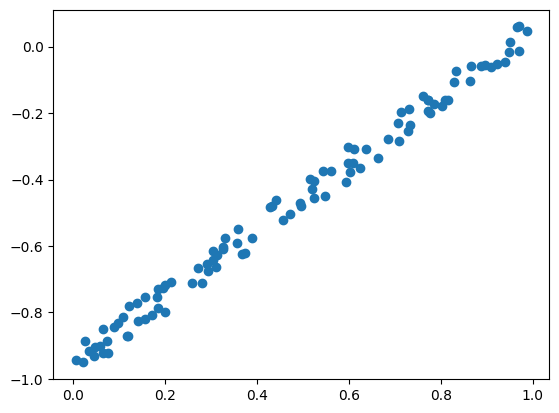

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a, b = 1, -1
samples = 100

np.random.seed(42)
x = 1 * np.random.rand(samples, 1)
eta = 0.1 * np.random.rand(samples, 1)
y = a * x + b + eta

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

In [2]:
mesh = np.mgrid[-1.5:-0.5:0.005, 0.5:1.5:0.005]
thetas = np.stack(mesh, axis=-1).reshape(-1, 2)
h = lambda theta, X: np.matmul(thetas, X.T)

X = np.hstack((np.ones((samples, 1)), x))
Ji = h(thetas, X).T - y
J = 0.5 / samples * np.sum(Ji * Ji, axis=0).reshape(-1, thetas.shape[0]).T

xyz = np.hstack((thetas, J))
np.savetxt("tmp.txt", xyz, delimiter=" ")

In [3]:
%load_ext gnuplot_kernel

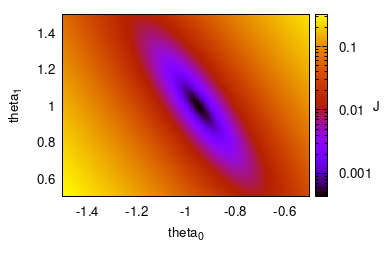

In [4]:
%%gnuplot
reset
set yr[0.5:1.5]
set xr[-1.5:-0.5]
set log cb
set xlabel "theta_0"
set ylabel "theta_1"
set cblabel "J" rotate by 0 offset -1
p "tmp.txt" w image notitle

## Algorithm implementation

In [5]:
X = np.hstack((np.ones((samples, 1)), x))
h = lambda theta, X: np.matmul(X, theta)
gradJ = lambda theta: 1. / samples * ((h(theta, X) - y) * X).sum(axis=0).reshape(2, 1)

def gradient_descent(theta, k=1000, alpha=0.01):
    trajectory = [theta]
    for _ in range(k):
        theta = theta - alpha * gradJ(theta) 
        trajectory.append(theta)    
    return np.array(trajectory).reshape(k + 1, 2)

## Experiments

In [6]:
i = 0
for theta in [
    np.array([[-1.4, 0.6]]).T, 
    np.array([[-1.2, 1.2]]).T,
    np.array([[-0.8, 1.2]]).T,
    np.array([[-0.6, 0.6]]).T,
]:
    np.savetxt("trajectory_" + str(i) + ".txt", gradient_descent(theta, k=40, alpha=0.5), delimiter=" ")
    i += 1

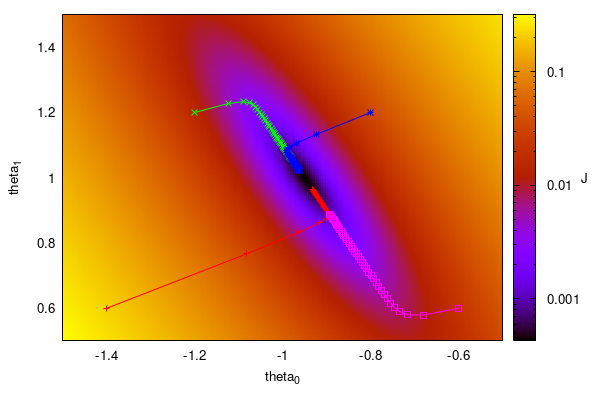


Terminal type is now 'pngcairo'
Options are ' background "#ffffff" enhanced fontscale 1.0 size 600, 400 '

In [7]:
%%gnuplot
reset

set term pngcairo enhanced size 600, 400
set yr[0.5:1.5]
set xr[-1.5:-0.5]
set log cb
set macro
set xlabel "theta_0"
set ylabel "theta_1"
set cblabel "J" rotate by 0 offset -1
set key noautotitle

set colorsequence classic

p "tmp.txt" w image notitle,\
    "trajectory_0.txt" w lp lc 1,\
    "trajectory_1.txt" w lp lc 2,\
    "trajectory_2.txt" w lp lc 3,\
    "trajectory_3.txt" w lp lc 4,\



In [8]:
Ex = np.average(x)
Ey = np.average(y)
Exy = np.average(x * y)
Ex2 = np.average(x * x)

theta1 = (Exy - Ex * Ey) / (Ex2 - Ex * Ex)
theta0 = Ey - theta1 * Ex
exact_theta = np.array([[theta0], [theta1]])

for alpha in [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0]:
    err = gradient_descent(theta, k=100, alpha=alpha)-exact_theta.T
    err = (err * err).sum(axis=1)
    np.savetxt("alpha_conv_" + str(alpha) + ".txt", err, delimiter=" ")

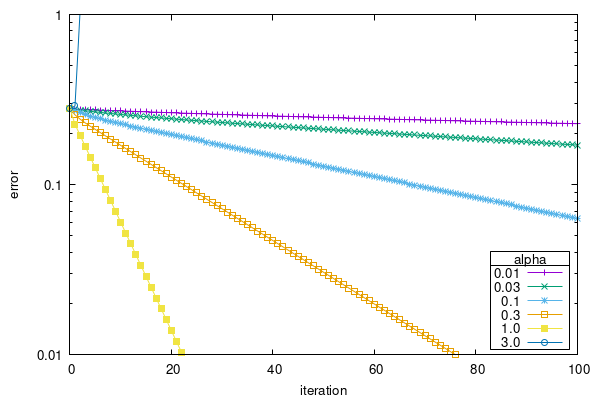


Terminal type is now 'pngcairo'
Options are ' background "#ffffff" enhanced fontscale 1.0 size 600, 400 '

In [9]:
%%gnuplot
reset
set term pngcairo enhanced size 600, 400
set colorsequence default
set yr[0.01:1]

set log y

set key title "alpha" opaque box b r
set xlabel "iteration"
set ylabel "error"

p \
    "alpha_conv_0.01.txt" u 0:1 w lp t '0.01',\
    "alpha_conv_0.03.txt" u 0:1 w lp t '0.03',\
    "alpha_conv_0.1.txt" u 0:1 w lp t '0.1',\
    "alpha_conv_0.3.txt" u 0:1 w lp t '0.3',\
    "alpha_conv_1.0.txt" u 0:1 w lp t '1.0',\
    "alpha_conv_3.0.txt" u 0:1 w lp t '3.0',\

